# Experimenting with Models - SPT Sample

Allen Pinjic - Created on May 23rd, 2022

In [27]:
from astropy.io.fits import getdata
from astropy.table import Table
import numpy as np

In [28]:
fname = '../data_set/sptecs_catalog_oct919.fits'

data = Table(getdata(fname))

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as plt
import scipy.stats
import scipy.optimize
%matplotlib inline

In [30]:
df = data.to_pandas()

h = 0.7
df['log_M500'] = np.log10(df.M500*1e14*h)
df['log_LAMBDA_CHISQ'] = np.log10(df.LAMBDA_CHISQ)

/data0/sw/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [55]:
# MORE ACCURATE METHOD (WHY?)
# Calculating the log of the mean mass error
h=0.7
m500 = df.M500.to_numpy()*1e14*h
log_m500 = np.log10(m500)

lerr = df.M500_LERR.to_numpy()*1e14*h
uerr = df.M500_UERR.to_numpy()*1e14*h

m500_err = (lerr+uerr)/2 # mean mass error
log_m500_err = m500_err/m500

# Eliminating NaN values from the log_m500_err data set
nnan = ~np.isnan(log_m500_err)
nnan2 = ~np.isnan(log_m500)

print(log_m500_err[nnan])

[0.16368333 0.17915493 0.14510863 0.13287795 0.15453787 0.13091302
 0.1255449  0.13966905 0.17157665 0.12711181 0.14455521 0.16254705
 0.15289187 0.14366533 0.14061135 0.1144172  0.13517289 0.15905228
 0.12909254 0.17391826 0.19054088 0.12877806 0.19349806 0.1505976
 0.17036884 0.19694197 0.1909112  0.15323159 0.14260262 0.14876176
 0.18358067 0.14775938 0.11750435 0.127384   0.1432702  0.18361384
 0.12594499 0.17701048 0.14643702 0.1818073  0.12344471 0.15682109
 0.13674496 0.1775161  0.14058556 0.1707992  0.18432623 0.19003358
 0.12942845 0.17094515 0.12919684 0.1844871  0.18896198 0.12234488
 0.18348624 0.17148364 0.12253923 0.15393701 0.18699881 0.18548767
 0.14985646 0.12727705 0.11152711 0.14617577 0.14665444 0.1740585
 0.1713547  0.11469115 0.12697357 0.18855534 0.17741594 0.12192897
 0.1722048  0.18938497 0.12746844 0.1151233  0.17387898 0.18749997
 0.1439868  0.18290196 0.18897203 0.18290156 0.15371056 0.16087735
 0.11721341 0.14345181 0.11441267 0.17527904 0.18354706 0.118274

In [56]:
# Calculating the log of the richness error

lbd = df.LAMBDA_CHISQ.to_numpy()
lbd_err = df.LAMBDA_CHISQ_E.to_numpy()

log_lbd = df.log_LAMBDA_CHISQ
log_lbd_err = lbd_err/lbd

# Eliminating NaN values from the log_lbd_err data set
nnan3 = ~np.isnan(log_lbd_err)
nnan4 = ~np.isnan(log_lbd)

In [33]:
df0 = df
redshift = df0.REDSHIFT.to_numpy()
lbd = df0.LAMBDA_CHISQ.to_numpy()
zcut = (redshift > 0.1) & (redshift < 0.65)
lcut = lbd > 20
final_cut = zcut & lcut

In [34]:
df = df0.loc[final_cut].copy()

In [35]:
df

,SPT_ID,RA,DEC,FIELD,XI,THETA_CORE,REDSHIFT,REDSHIFT_UNC,SPECZ,REDSHIFT_SOURCE,...,LAMBDA_CHISQ,LAMBDA_CHISQ_E,RADIO_CONTAM,STRONG_LENS,IMAGE_SOURCE,SPECZ_REF,STRONG_LENS_REF,PHOTOMETRIC_ZREF,log_M500,log_LAMBDA_CHISQ
1,SPT-CLJ0005-3751,1.438318,-37.854369,ra1hdec-35,6.336327,0.75,0.482958,0.007242,0,4.0,...,86.408386,4.735215,0.0,1.0,3.0,,,,14.579018,1.936556
2,SPT-CLJ0005-3443,1.487651,-34.719271,ra1hdec-35,5.514429,2.00,0.114000,0.000000,1,9.0,...,105.385574,4.646943,0.0,0.0,8.0,1989ApJS...70....1A,,,14.571418,2.022781
7,SPT-CLJ0020-2543,5.173062,-25.727583,ra1hdec-25,7.141808,1.50,0.141000,0.000000,1,9.0,...,101.159950,18.001257,0.0,0.0,8.0,1999ApJS..125...35S,,,14.692856,2.005009
10,SPT-CLJ0042-2831,10.526915,-28.522130,ra1hdec-25,8.122652,1.75,0.108600,0.000000,1,9.0,...,70.527962,2.828000,0.0,0.0,8.0,2002MNRAS.329...87D,,,14.734903,1.848361
11,SPT-CLJ0042-3809,10.613344,-38.151329,ra1hdec-35,6.616126,1.25,0.219660,0.000000,1,9.0,...,74.723076,2.981047,0.0,0.0,8.0,1996ApJ...470..172S,,,14.623611,1.873455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,SPT-CLJ0552-4008,88.123056,-40.136343,ra5hdec-35,4.359108,2.00,0.362500,0.009275,0,4.0,...,65.890450,4.650317,0.0,0.0,3.0,,,,14.441915,1.818823
429,SPT-CLJ0554-3149,88.528647,-31.830573,ra5hdec-35,4.620441,0.25,0.218471,0.005045,0,4.0,...,21.193373,2.535579,0.0,0.0,3.0,,,,14.477150,1.326200
430,SPT-CLJ0556-2502,89.156331,-25.042366,ra5hdec-25,4.130208,0.25,0.624432,0.013504,0,4.0,...,20.384859,2.782436,0.0,0.0,3.0,,,,14.405722,1.309308
431,SPT-CLJ0557-2626,89.371706,-26.437366,ra5hdec-25,4.008900,0.75,0.598462,0.008865,0,4.0,...,45.250465,3.503051,0.0,0.0,3.0,,,,14.403927,1.655623


In [36]:
# The default data set that will be used for the models below

## Creating a Linear Regression Model - Matplotlib

In [37]:
sns.set_theme(style="darkgrid")

Text(0, 0.5, 'Value of Log of M500')

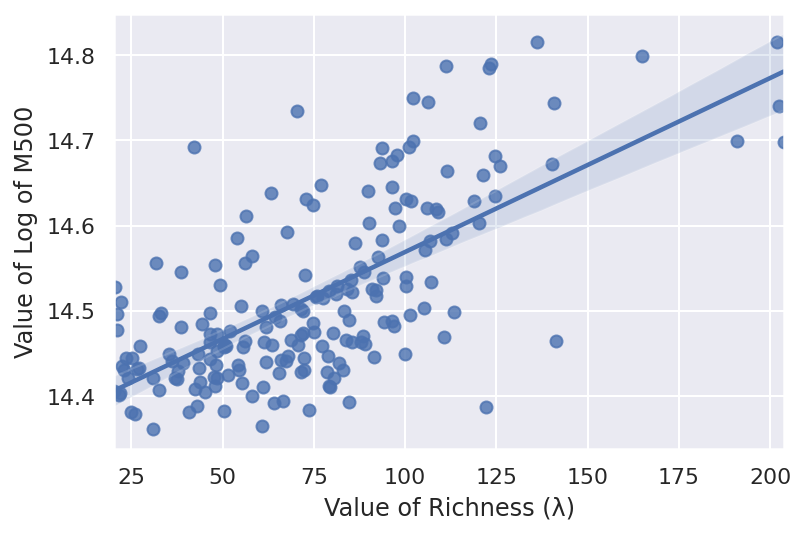

In [38]:
# With confidence interval
ax1 = sns.regplot(x=df["LAMBDA_CHISQ"], y=df["log_M500"], fit_reg=True)
ax1.set_xlabel('Value of Richness (λ)')
ax1.set_ylabel('Value of Log of M500')

Text(0, 0.5, 'Value of Log of M500')

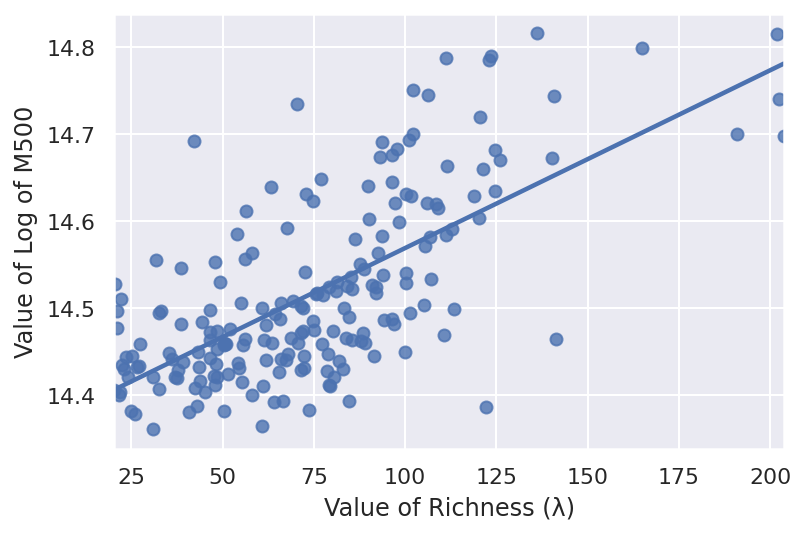

In [39]:
# Without confidence interval
ax2 = sns.regplot(x=df["LAMBDA_CHISQ"], y=df["log_M500"], fit_reg=True, ci = None)
ax2.set_xlabel('Value of Richness (λ)')
ax2.set_ylabel('Value of Log of M500')

In [40]:
# REQUIRED FUNCTIONS

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "blue")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()

Estimated coefficients:
b_0 = -16.37048311594341            
b_1 = 1.253272009708745


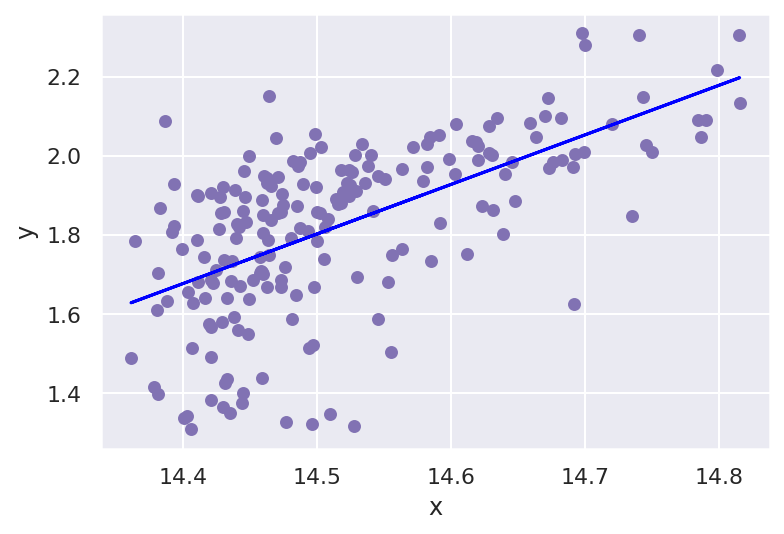

In [41]:
# Reversed the value of each axis
# (Original orientation: x-axis= log Richness and y-axis= log M500)
# (New orientation: x-axis= log M500 and y-axis= log Richness)

# Done in order to obtain proper values for the slope and y-intercept
# Since the graph is truncated

y = df['log_LAMBDA_CHISQ']
x = df['log_M500']
  
    # estimating coefficients
b = estimate_coef(x, y)
b1= b[0], 0.8
print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
plot_regression_line(x, y, b)

# b_0 is the y-intercept of the regression line
# b_1 is the slope of the regression line

Estimated coefficients:
b_0 = 13.980615255250456            
b_1 = 0.29429886794975235


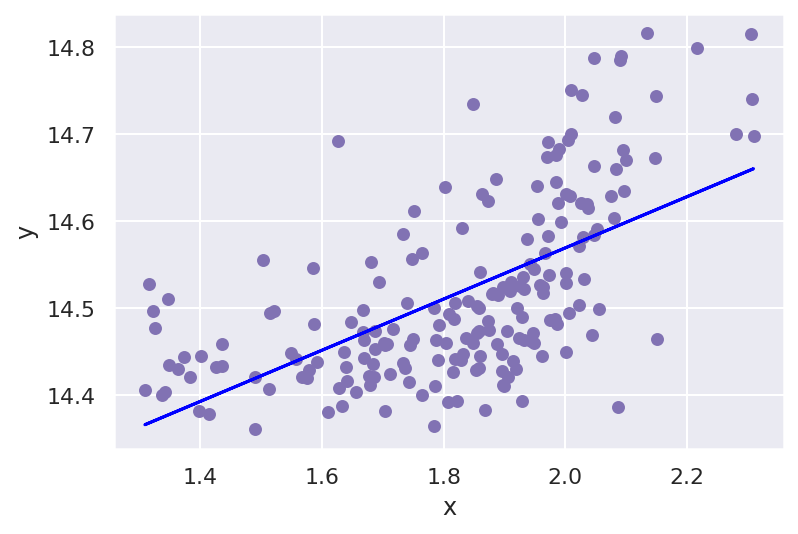

In [42]:
# Truncated version of the graph

x = df['log_LAMBDA_CHISQ']
y = df['log_M500']
  
    # estimating coefficients
b = estimate_coef(x, y)
b1= b[0], 0.8
print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
plot_regression_line(x, y, b)

# b_0 is the y-intercept of the regression line
# b_1 is the slope of the regression line

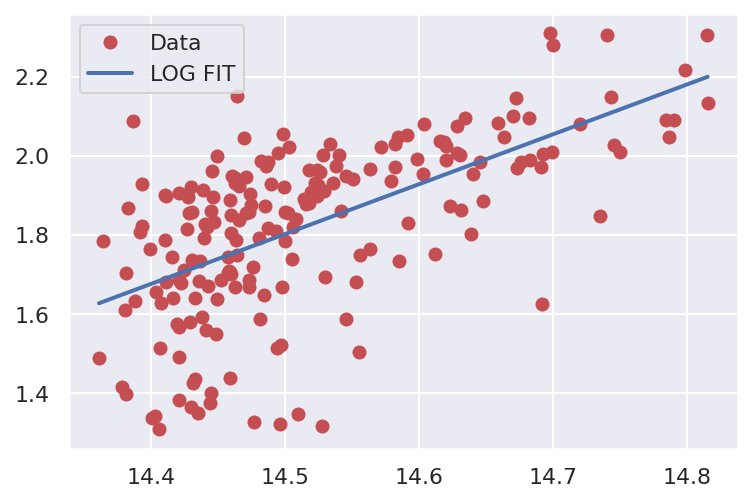

In [43]:
from scipy.optimize import curve_fit

# Conversion from tuples to arrays
logRichness = df.log_LAMBDA_CHISQ.to_numpy()
logMass = df.log_M500.to_numpy()

# Switched positions of where to insert logRichness and logMass
# in order to match them with opposite axes like with the previous graph
f=lambda x,a,b: a*x + b
fit=curve_fit(f,logMass, logRichness)
xsmooth=np.linspace(np.min(logMass), np.max(logMass), 1000)
plt.plot(logMass,logRichness,'ro',label='Data')
plt.plot(xsmooth,f(xsmooth,*fit[0]),'b-',linewidth=2,label='LOG FIT')
plt.legend()

In [44]:
print('Combination of Slope and Y-Intercept:', fit[0])
print('Slope:', fit[0][0])
print('Y-Intercept:', fit[0][1])

Combination of Slope and Y-Intercept: [  1.26061139 -16.47703417]
Slope: 1.2606113874713598
Y-Intercept: -16.477034173381067


## Creating a Generative Probabilistic Model

In [45]:
# Changes the size of the graph and font
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20

In [46]:
logRichness = df['log_LAMBDA_CHISQ']
logOfMass = df['log_M500']

# Converting selected columns from the pandas dataframe into a numpy array

logRichnessArray = df['log_LAMBDA_CHISQ'].to_numpy()
logOfMassArray = df['log_M500'].to_numpy()
x = logRichnessArray
y = logOfMassArray

# Implementing an error bar for every point
# within the x and y arrays
# Still do not know how to properly calculate the values of yerr
yerr = [0.1]*196

# Changing the type from tuple to an array
yerr = np.array(yerr)

In [47]:
# Checking to make sure that each array is one-dimensional
print(logRichnessArray.shape)
print(logOfMassArray.shape)

# If an array is not one-dimensional, use the statement below:
#(Insert name) = np.squeeze(Insert array name here)

(196,)
(196,)


Least-squares estimates:
m = 0.294 ± 0.033
b = 13.981 ± 0.061


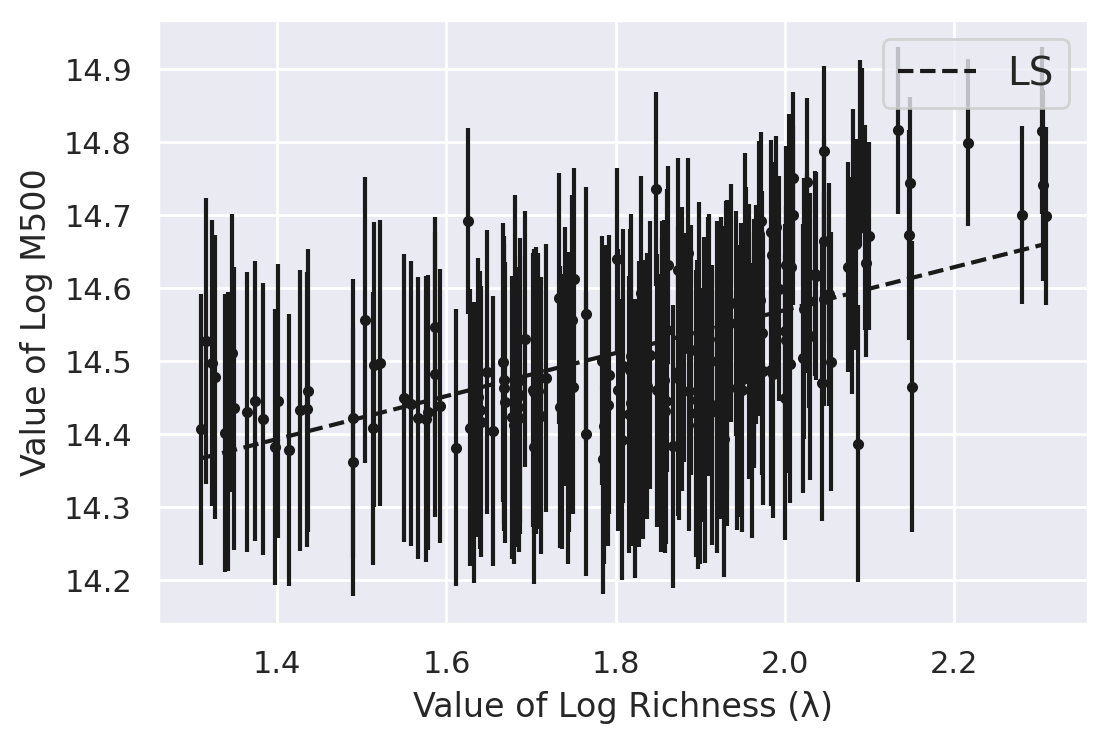

In [57]:
# From the emcee tutorial website
A = np.vander(x, 2)
C = np.diag(yerr * yerr)
ATA = np.dot(A.T, A / (yerr**2)[:, None])
cov = np.linalg.inv(ATA)
w = np.linalg.solve(ATA, np.dot(A.T, y / yerr**2))
print("Least-squares estimates:")
print("m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(w[1], np.sqrt(cov[1, 1])))

# Scaling of the graph via the x-axis
x0 = np.linspace(np.min(x), np.max(x), 1000)

# NEW ERROR BAR
plt.errorbar(log_lbd[nnan4], log_m500[nnan2], yerr=log_m500_err[nnan], fmt=".k", capsize=0)
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.legend(fontsize=14)
plt.xlabel("Value of Log Richness (λ)")
plt.ylabel("Value of Log M500");

## Creating a Maximum Likelihood Estimation Model

In [58]:
# REQUIRED FUNCTIONS

def log_likelihood(theta, x, y, yerr):
    m, b, log_f = theta
    model = m * x + b
    sigma2 = yerr**2 + model**2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

In [59]:
# IMPORTANT CELL
m_true = 0.294
b_true = 13.981
# f_true is the intrinsic error
f_true = 0.1

# Implementing an error bar for every point
# within the x and y arrays
# Still do not know how to properly calculate the values of yerr
yerr = [0.1]*196

# Changing the type from tuple to an array
yerr = np.array(yerr)

Maximum likelihood estimates:
m = 0.321
b = 13.981
f = 0.033


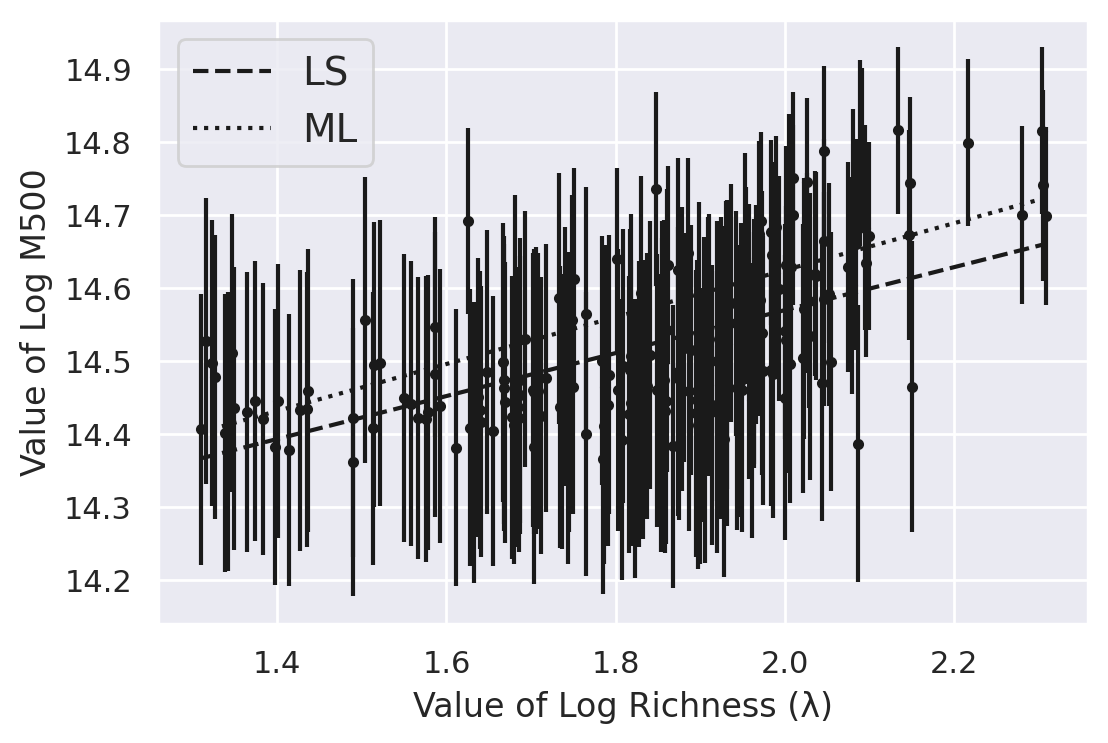

In [60]:
from scipy.optimize import minimize

nll = lambda *args: -log_likelihood(*args)
initial = np.array([m_true, b_true, np.log(f_true)])
soln = minimize(nll, initial, args=(x, y, yerr))
m_ml, b_ml, log_f_ml = soln.x

print("Maximum likelihood estimates:")
print("m = {0:.3f}".format(m_ml))
print("b = {0:.3f}".format(b_ml))
print("f = {0:.3f}".format(np.exp(log_f_ml)))

# NEW ERROR BAR
plt.errorbar(log_lbd[nnan4], log_m500[nnan2], yerr=log_m500_err[nnan], fmt=".k", capsize=0)
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), ":k", label="ML")
plt.legend(fontsize=14)
plt.xlabel("Value of Log Richness (λ)")
plt.ylabel("Value of Log M500");

## Creating a Marginalization & Uncertainty Estimation Model - MCMC

In [61]:
# REQUIRED FUNCTIONS

def log_prior(theta):
    m, b, log_f = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < log_f < 1.0:
        return 0.0
    return -np.inf


def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [62]:
import emcee

# Generate 1000 walkers
pos = soln.x + 1e-4 * np.random.randn(1000, 3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(x, y, yerr)
)
# Generate over 150,000 steps
sampler.run_mcmc(pos, 150000, progress=True);

  0%|          | 0/150000 [00:00<?, ?it/s]/data0/sw/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 150000/150000 [22:49<00:00, 109.52it/s]


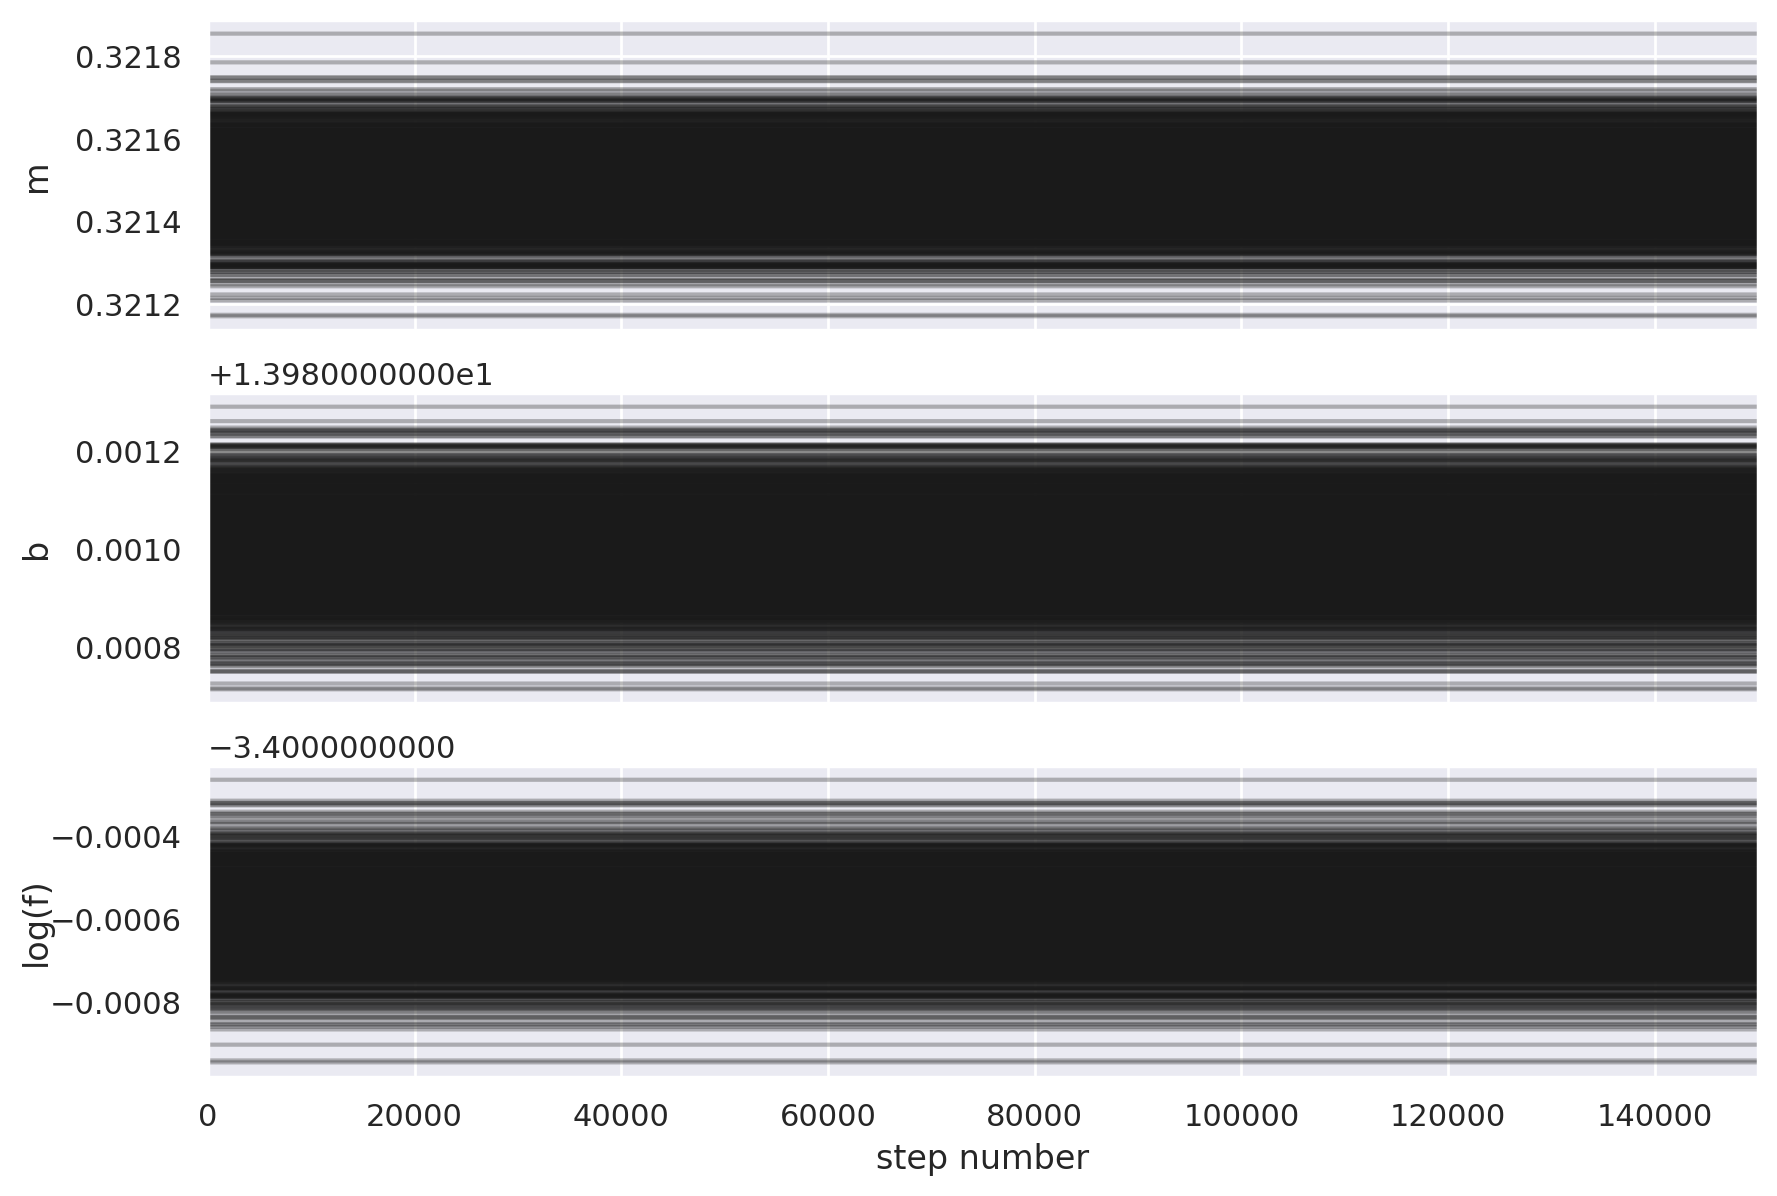

In [63]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["m", "b", "log(f)"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [65]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(9993000, 3)


## Generating a Corner Plot - MCMC

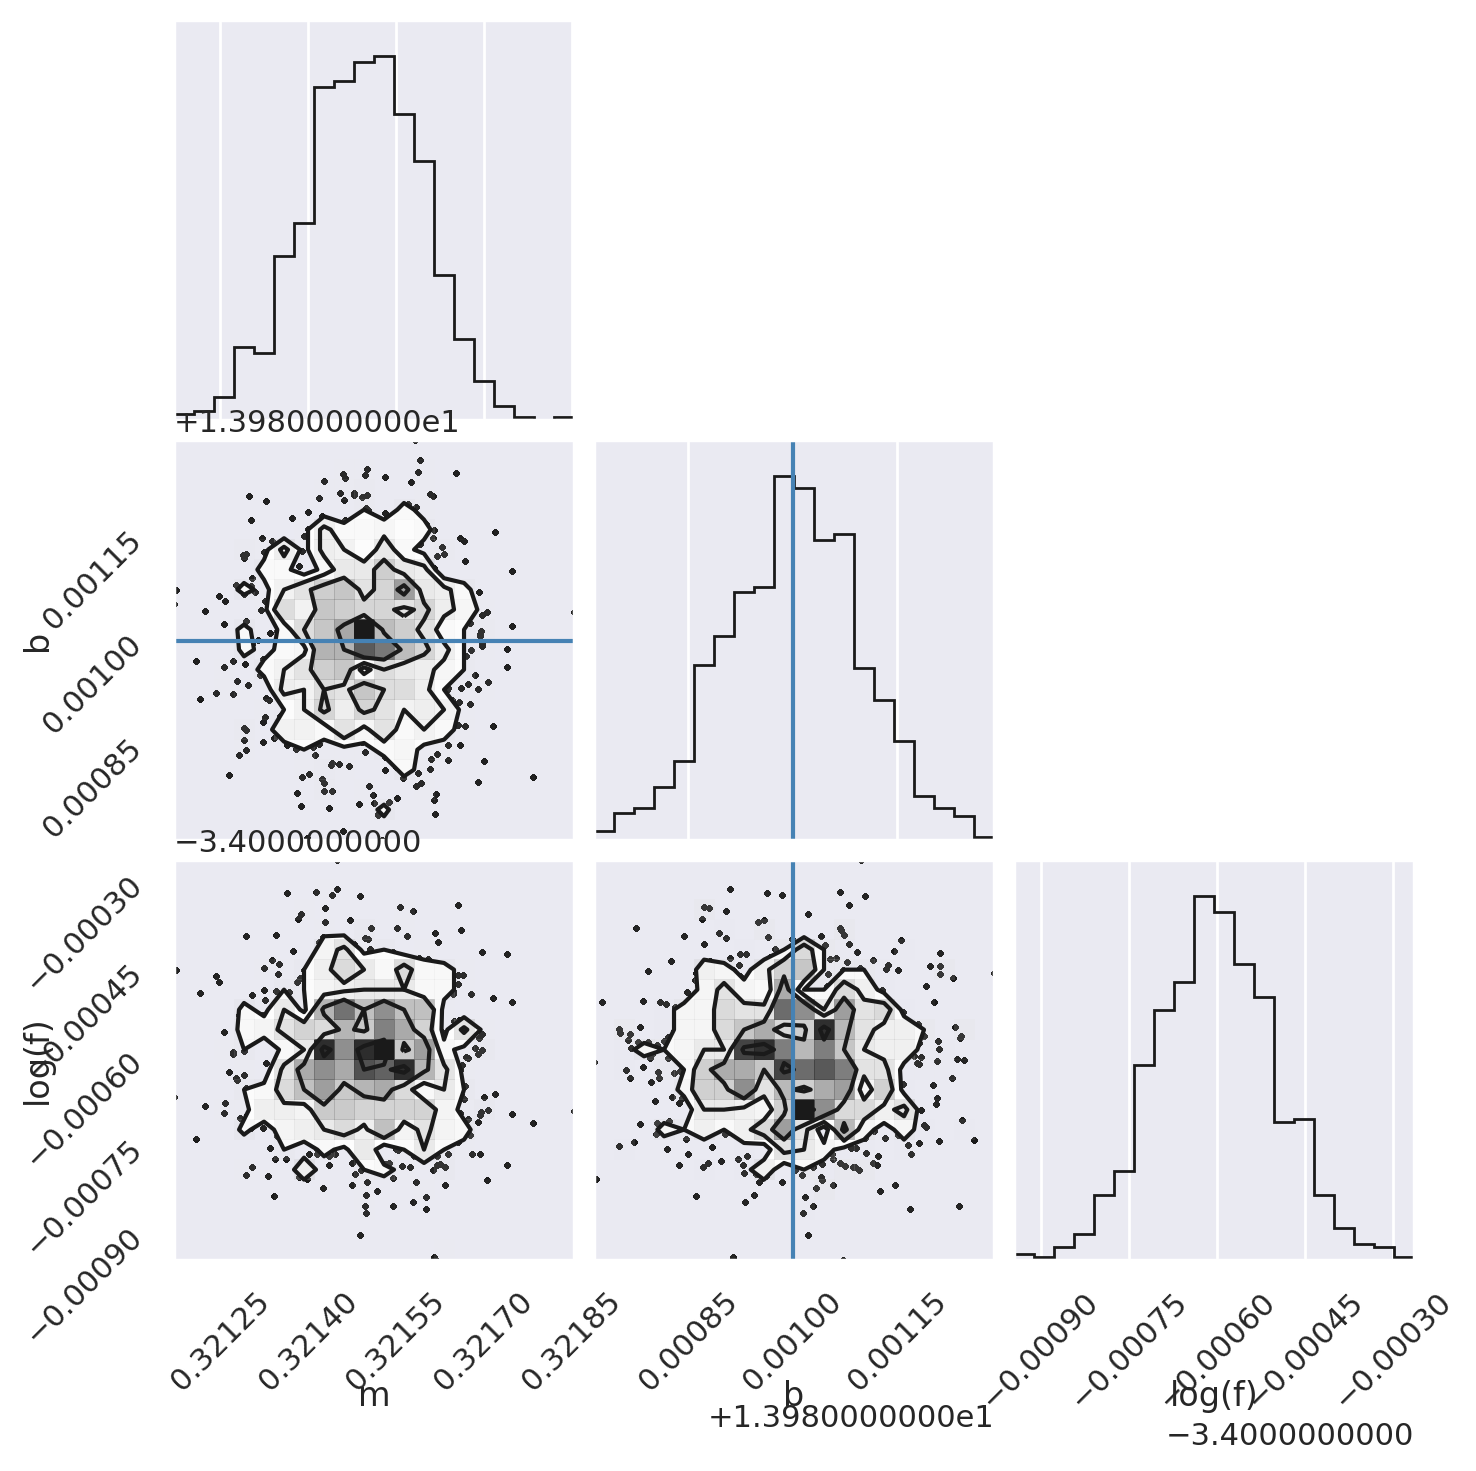

In [68]:
# Corner Plot
import corner
fig = corner.corner(
    flat_samples, labels=labels, truths=[m_true, b_true, np.log(f_true)]
    );

IndexError: boolean index did not match indexed array along dimension 0; dimension is 196 but corresponding boolean dimension is 3

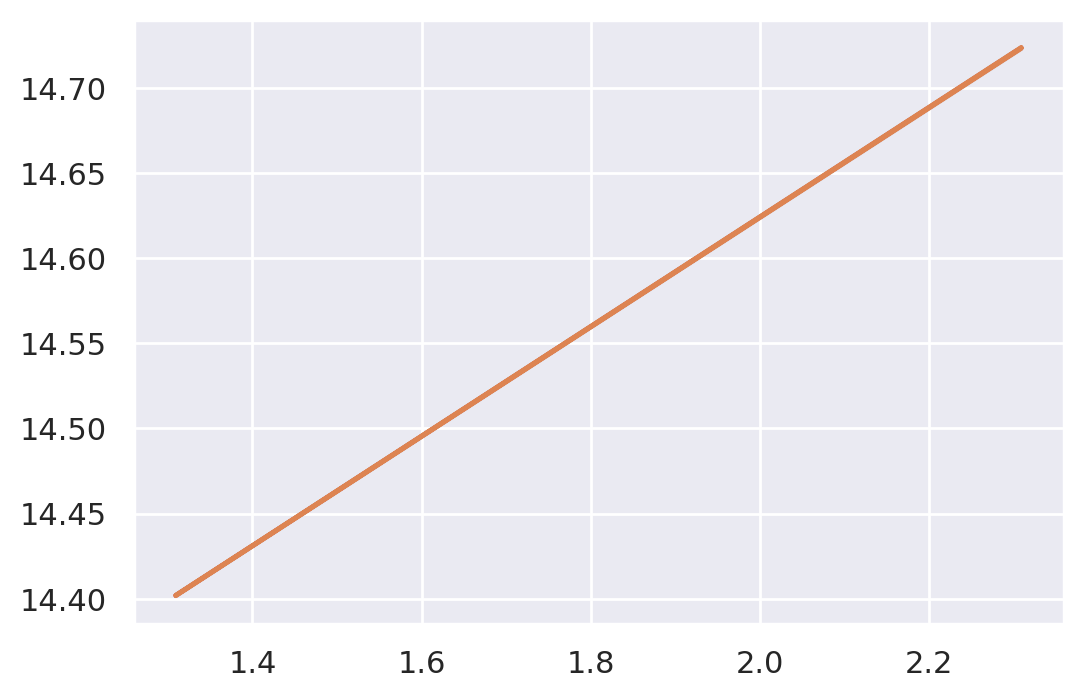

In [73]:
inds = np.random.randint(len(flat_samples), size=100)
for ind in inds:
    sample = flat_samples[ind]
    plt.plot(x0, np.dot(np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)
plt.errorbar(log_lbd[nnan4], log_m500[nnan2], yerr=log_m500_err[nnan], fmt=".k", capsize=0)
plt.xlabel("Value of Log Richness (λ)")
plt.ylabel("Value of Log M500");

In [74]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>